In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

## The Lorenz attractor

     In 1963, Edward Lorenz developed a simple mathematical model of the way air moves around in the atmosphere.
     His model was a system of three ordinary differential equations that demonstrate deterministic chaos at certain   
     parameter values and initial conditions. The Lorenz attractor is the system's strange attractor that resembles
     a butterfly when visualized. The Lorenz system is nonlinear, three-dimensional, and deterministic.                   
     The Lorenz attractor is a set of chaotic solutions of the Lorenz system and is the most famous depiction 
     of a system that exibits chaotic behavior. Very slight changes to the initial conditions of the system lead 
     to wildly different solutions. The system itself describes the movement of a point in a 3D space over time. 
    The system is described by three ordinary differential equations that represent the movement of this point (x, y, z).       In these equations, t represents time and sigma, rho, and beta are constant system parameters.

$$\displaystyle{ \frac{dx}{dt} = \sigma(y-x) \\
                 \frac{dy}{dt} = x(\rho-z)-y \\ 
                 \frac{dz}{dt} = xy-{\beta z}}$$ 

For his famous depiction of chaos, 
Lorenz used the values $\displaystyle{\sigma = 10, \beta = \frac{8}{3}, \rho = 28}$.

With these parameter values, the system exhibits deterministic chaos. It has a strange attractor with a fractal structure.

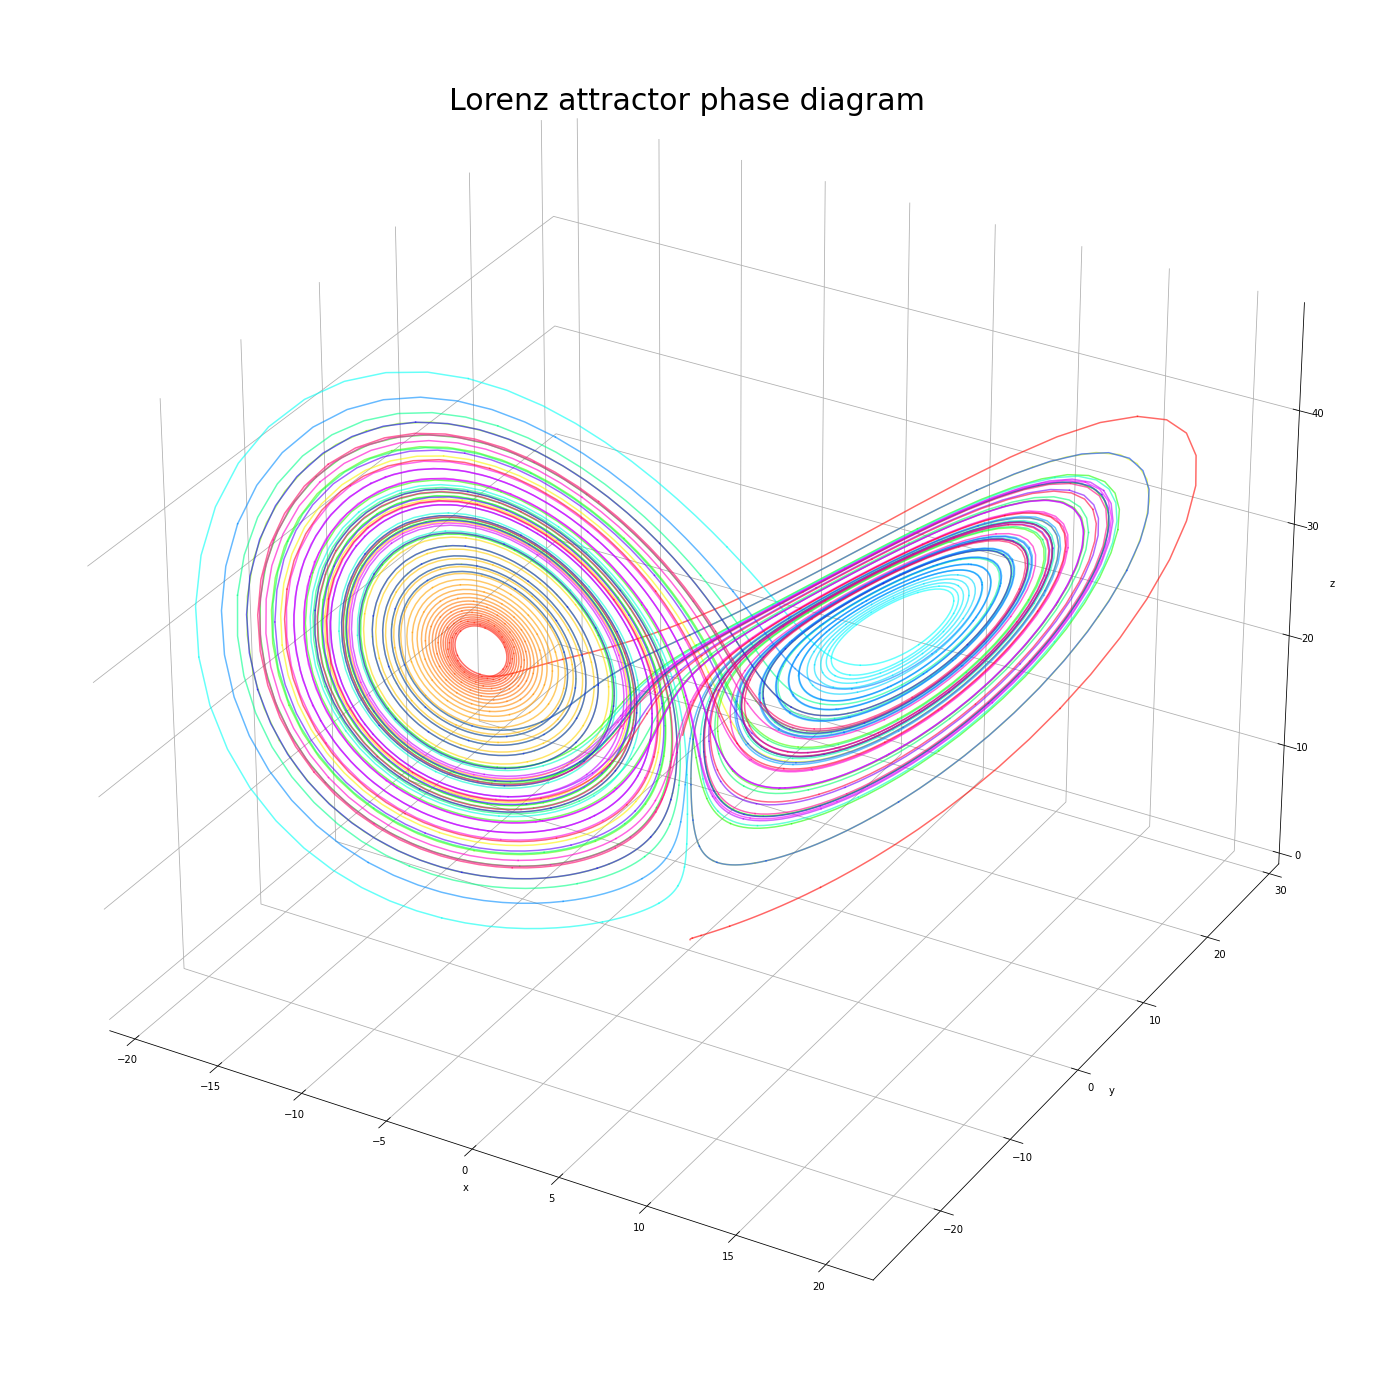

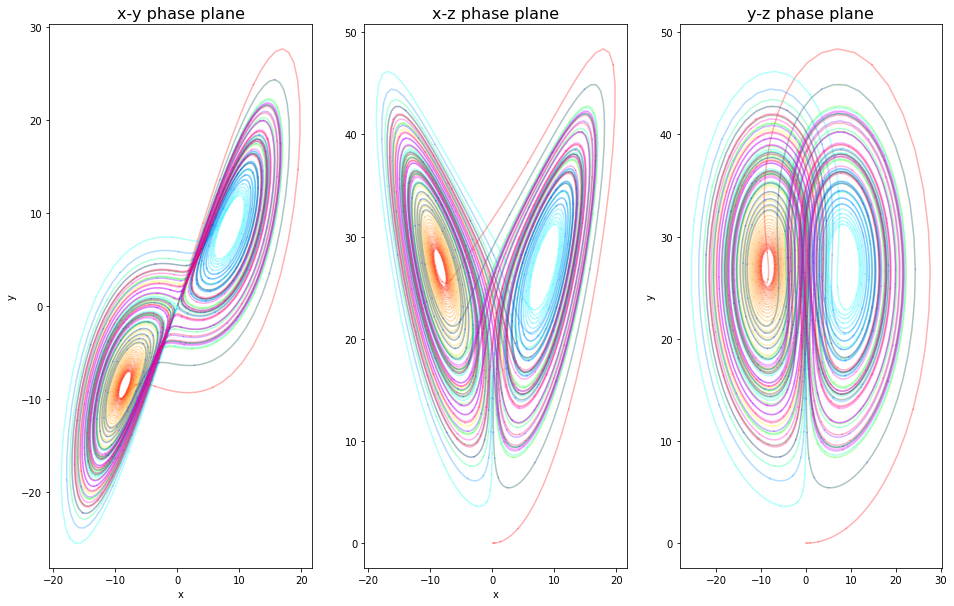

In [2]:
initial_state = [0.1, 0, 0] # the initial system state ( x, y, z positions in space)

sigma = 10.
rho   = 28.
beta  = 8./3.

start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

def lorenz_system(current_state, t):  # t is time
    x, y, z = current_state           # positions of x, y, z in space at the current time point
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

xyz = odeint(lorenz_system, initial_state, time_points)
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
s,n = 10, 10000
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.6)
ax.set_title('Lorenz attractor phase diagram', fontsize=30,y=0.9999)
plt.show()

# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(16, 10))

s = 10
n = 10000
for i in range(0,n-s,s):

    # plot the x values vs the y values
    ax[0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[0].set_title('x-y phase plane', fontsize=16)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    # plot the x values vs the z values
    ax[1].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[1].set_title('x-z phase plane', fontsize=16)
    ax[1].set_xlabel('x')
    # plot the y values vs the z values
    ax[2].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[2].set_title('y-z phase plane', fontsize=16)
    ax[2].set_ylabel('y')
plt.show()

## The Rössler attractor

    The Rössler system  a system of three non-linear ordinary differential equations originally studied by 
    Otto Rössler in the 1970s. These differential equations define a continuous-time dynamical system that
    exhibits chaotic dynamics associated with the fractal properties of the attractor.
    It has only one quadratic nonlinearity xz:
    
$$\displaystyle{
\frac{dx}{dt}= -y-z \\
\frac{dy}{dt}= x+a*y   \\
\frac{dz}{dt}= b+ z*(x- c) }$$

    Rössler studied the chaotic attractor with 
 $\displaystyle {a=0.2, b=0.2, c=5.7},$ , though properties of $\displaystyle {a=0.1, b=0.1, c=14}$ have been more commonly used since.

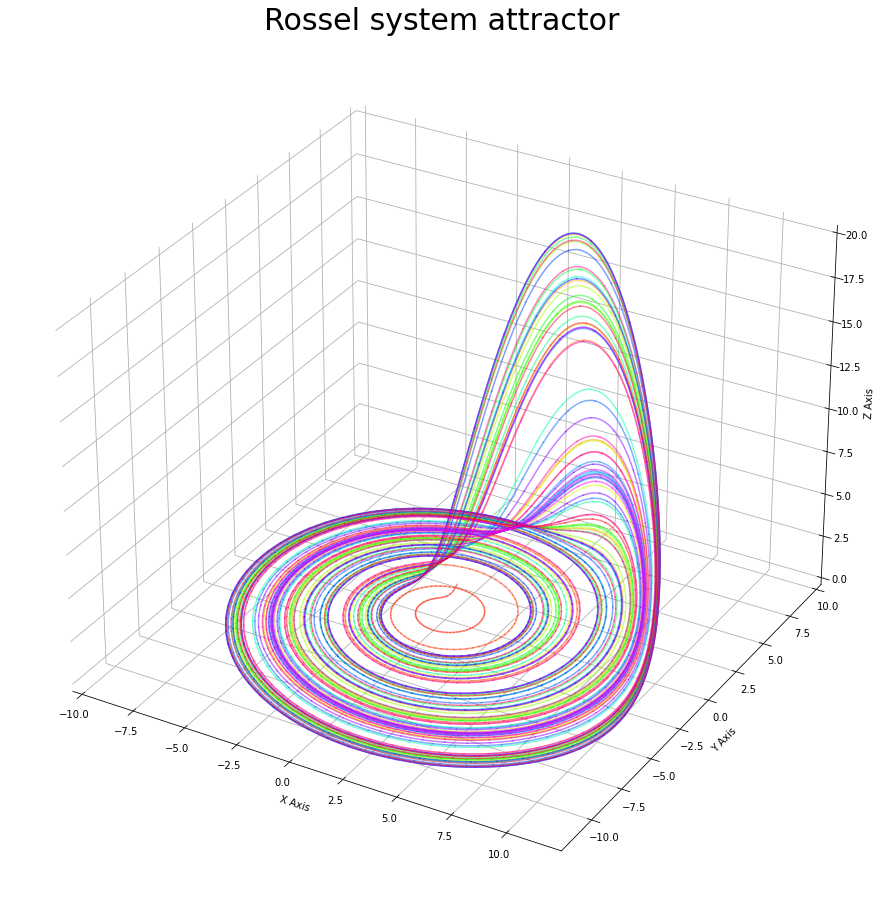

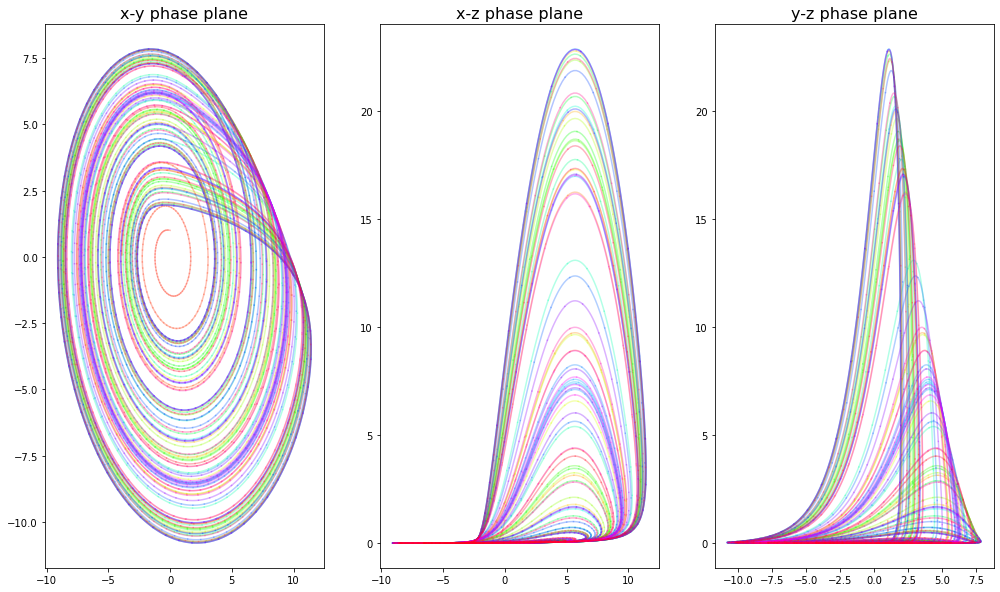

In [4]:
initial_state = [0., 1.0, 1.05]

a=0.2
b=0.2
c=5.7

start_time = 0.1
end_time = 600
interval = 100
n = end_time * interval
time_points = np.linspace(start_time, end_time, n)

def rossel_system(current_state, t):
    x, y, z = current_state
    dx_dt = -y-z
    dy_dt = x+a*y
    dz_dt = b+z*(x-c)
    return [dx_dt, dy_dt, dz_dt]

xyz=odeint(rossel_system, initial_state, time_points)

x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

fig = plt.figure(figsize=(16,16))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
s = 10
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.5)
ax.set_xlim((-10,12))
ax.set_ylim((-12,10))
ax.set_zlim((0,20))
ax.set_title('Rossel system attractor', fontsize=30)
plt.show()

# now plot two-dimensional cuts of the three-dimensional phase space
figlonavg, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 10))
s = 10
for i in range(0,n-s,s):
    ax[0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.3)
    ax[0].set_title('x-y phase plane', fontsize=16)
    ax[1].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.3)
    ax[1].set_title('x-z phase plane', fontsize=16)
    ax[2].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.3)
    ax[2].set_title('y-z phase plane', fontsize=16)
plt.show()

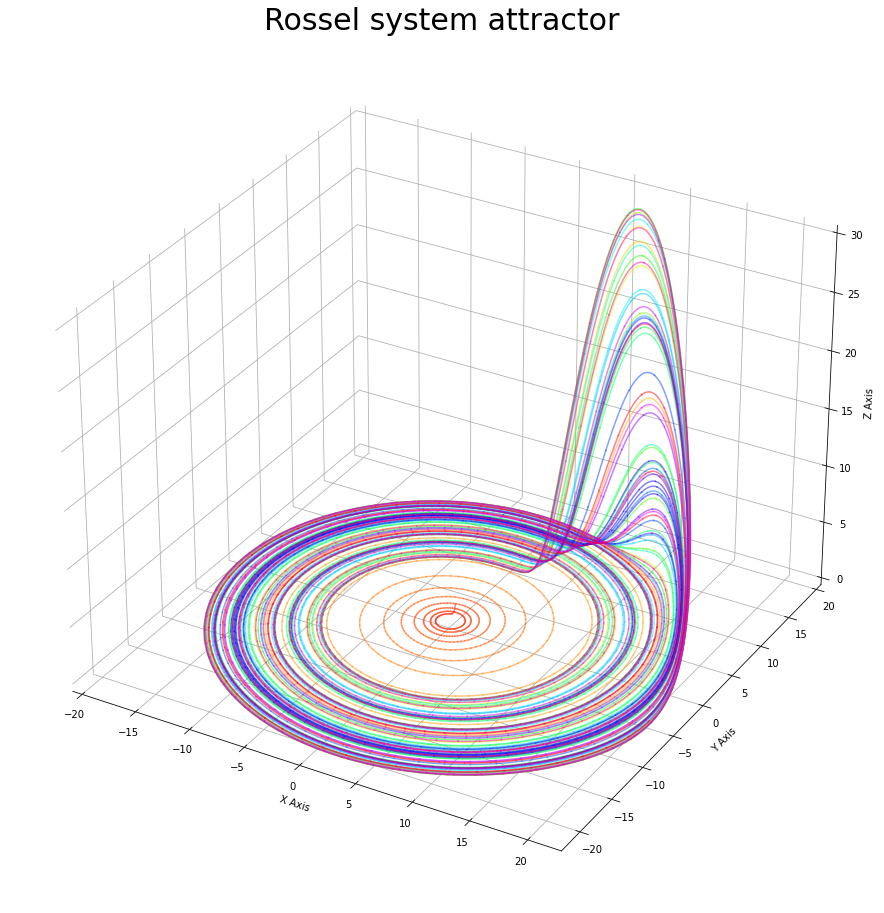

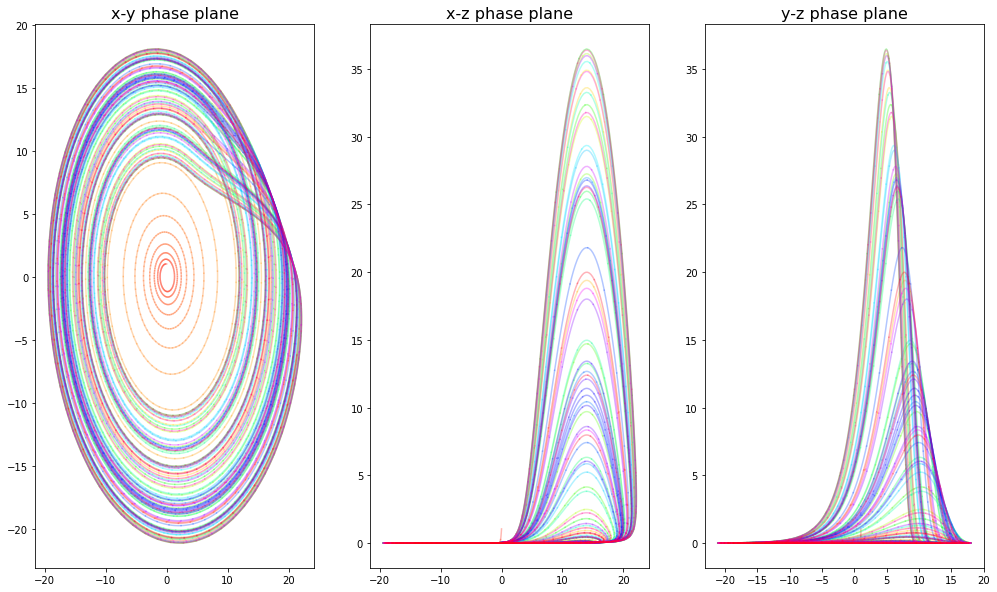

In [8]:
initial_state = [0., 1.0, 1.05]

a=0.1
b=0.1
c=14

start_time = 0.1
end_time = 600
interval = 100
n = end_time * interval
time_points = np.linspace(start_time, end_time, n)

def rossel_system(current_state, t):
    x, y, z = current_state
    dx_dt = -y-z
    dy_dt = x+a*y
    dz_dt = b+z*(x-c)
    return [dx_dt, dy_dt, dz_dt]

xyz=odeint(rossel_system, initial_state, time_points)

x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

fig = plt.figure(figsize=(16,16))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
s = 10
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.5)
ax.set_xlim((-20,22))
ax.set_ylim((-22,20))
ax.set_zlim((0,30))
ax.set_title('Rossel system attractor', fontsize=30)
plt.show()

# now plot two-dimensional cuts of the three-dimensional phase space
figlonavg, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 10))
s = 10
for i in range(0,n-s,s):
    ax[0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.3)
    ax[0].set_title('x-y phase plane', fontsize=16)
    ax[1].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.3)
    ax[1].set_title('x-z phase plane', fontsize=16)
    ax[2].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1000)/n), alpha=0.3)
    ax[2].set_title('y-z phase plane', fontsize=16)
plt.show()

## The Aizawa attractor 

    It is a system of equations that, when applied iteratively on three-dimensional coordinates, 
    evolves in such a way as to have the resulting coordinates map out a three dimensional shape, 
    in this case a sphere with a tube-like structure penetrating one of it's axis. 
    
The equations themselves are fairly straightforward:
$$\displaystyle{
\frac{dx}{dt} = (z-b) * x - d*y \\
\frac{dy}{dt} = d * x + (z-b) * y \\
\frac{dz}{dt} = c + a*z - \frac{z^3 }{3} - x^2 + f * z * x^3 }$$

where $\displaystyle{a = 0.95, b = 0.7, c = 0.6, d = 3.5, e = 0.25, f = 0.1}$

     Each previous coordinate is input into the equations, 
     the resulting value multiplied by a time value (here arbitrarily chosen as 0.01) 
     and then added to the previous value. To place this in the context of a program, 
     and utilizing a previous java class structure developed for the Lorenz Attractor,
     a new Transform implementation would be of the form:

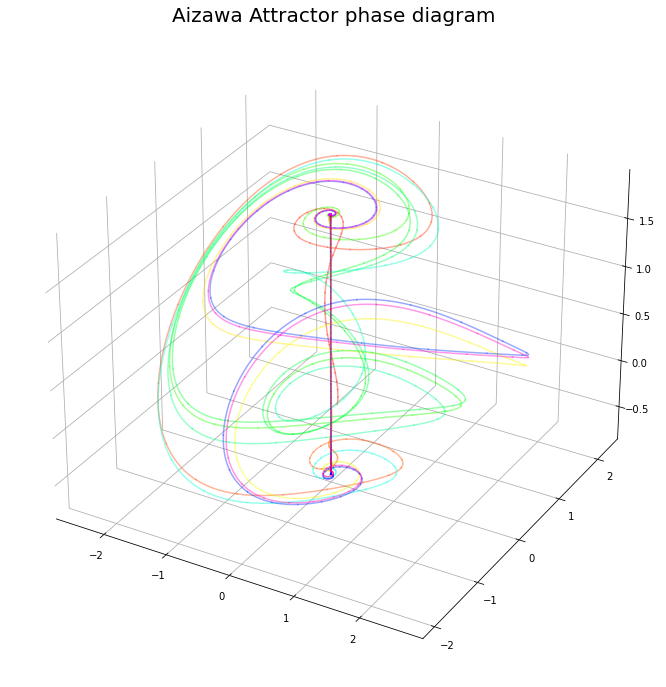

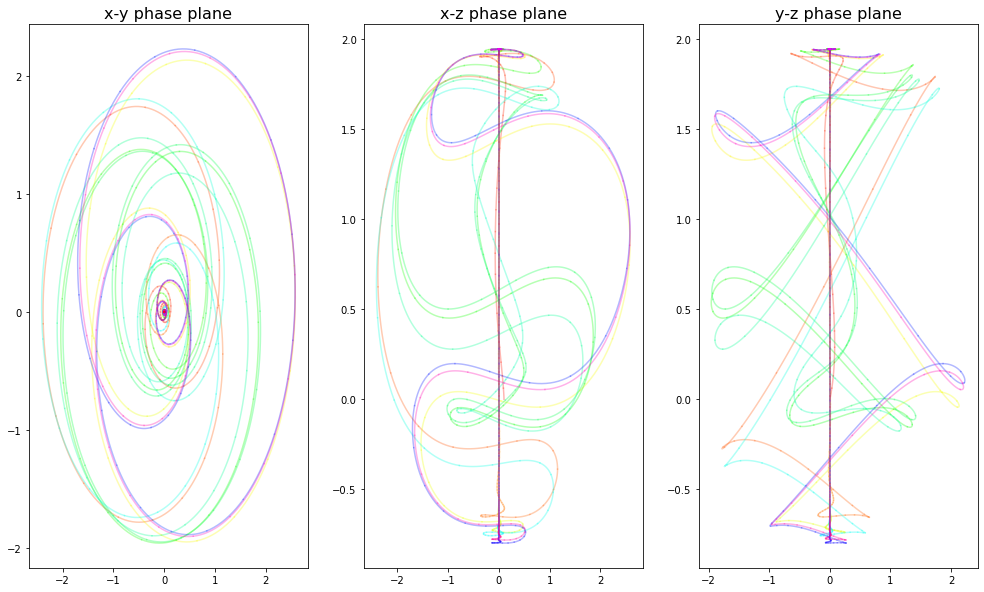

In [9]:
initial_state = [0.1, 0., 0.]

a=0.95
b=0.7
c=0.6
d=3.5
e=0.25
f=0.1

start_time = 0
end_time = 100000
time_points = np.linspace(start_time, end_time, end_time*100)


def Aizawa_Attractor(current_state, t):
    x, y, z = current_state
    dx_dt = (z-b)*x-d*y
    dy_dt = d*x+(z-b)*y
    dz_dt = c+(a*z)-(z*z*z/3)-(x*x)+(f*z*x*x*x)
    return [dx_dt, dy_dt, dz_dt]
xyz = odeint(Aizawa_Attractor, initial_state, time_points)

x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
s = 10
n = 10000
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.4)
ax.set_title('Aizawa Attractor phase diagram', fontsize=20)
plt.show()

# now plot two-dimensional cuts of the three-dimensional phase space
figlonavg, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 10))
s = 10
n = 10000
for i in range(0,n-s,s):
    ax[0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+111)/n), alpha=0.3)
    ax[0].set_title('x-y phase plane', fontsize=16)
    ax[1].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+111)/n), alpha=0.3)
    ax[1].set_title('x-z phase plane', fontsize=16)
    ax[2].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+111)/n), alpha=0.3)
    ax[2].set_title('y-z phase plane', fontsize=16)
plt.show()